<a href="https://colab.research.google.com/github/pemiran1/Relax-Inc.-Take-Home-Challenge/blob/main/Relax_Inc_Take_Home_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Relax Inc. Take Home Challenge**

In [3]:
from google.colab import files


uploaded = files.upload()

Saving takehome_user_engagement.csv to takehome_user_engagement.csv
Saving takehome_users.csv to takehome_users.csv


In [21]:
#Import Libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [22]:
user_data = pd.read_csv('takehome_user_engagement.csv')
user_data.head(10)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [23]:
user_data['time_stamp'] = pd.to_datetime(
    user_data['time_stamp'], format='%Y-%m-%d %H:%M:%S'
)

In [24]:
def logins_per_days(df, days=7, logins=3):
    from datetime import timedelta
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    passed_days = df['date'].diff(periods=logins-1)
    return any(passed_days <= timedelta(days=days))

In [25]:
engaged = user_data.groupby('user_id').apply(logins_per_days)
engaged.name = 'adopted_user'

In [26]:
print('{} users adopted out of {} total users.'.format(
    sum(engaged), len(engaged)))

1656 users adopted out of 8823 total users.


In [27]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1',parse_dates=True)

In [28]:
#Read User Data
cols = ['object_id', 'creation_source', 'creation_time',
        'last_session_creation_time', 'opted_in_to_mailing_list',
        'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [29]:
users['org_id'].value_counts().head()

org_id
0    319
1    233
2    201
3    168
4    159
Name: count, dtype: int64

In [30]:
users = users.drop(['org_id', 'invited_by_user_id'], axis=1)

In [31]:
import datetime
from datetime import timedelta

In [32]:
import pandas as pd

# Convert to datetime
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

# Check for missing values
if users['creation_time'].isnull().any() or users['last_session_creation_time'].isnull().any():
    # Handle missing values here, such as filling with a default datetime or dropping rows
    pass

# User History
users['history'] = (users['last_session_creation_time'] - users['creation_time']).dt.days

# Calculation
latest = max(users['creation_time'])
users['account_age'] = (latest - users['creation_time']).dt.days

# Drop Original Columns
users = users.drop(['creation_time', 'last_session_creation_time'], axis=1)


In [33]:
users.head(10)

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,history,account_age
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,0.0,38
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,136.0,196
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,0.0,437
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1.0,374
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,5.0,498
5,6,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,0,0,2.0,164
6,7,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,0,1,4.0,530
7,8,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1,1,NaN,303
8,9,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,0,0,NaN,206
9,10,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1,1,503.0,499


In [34]:
users = users.set_index('object_id')
users.index.name = 'user_id'
datas = pd.concat([users, engaged], axis=1, join='inner')
datas['adopted_user'] = datas['adopted_user'].astype(int)

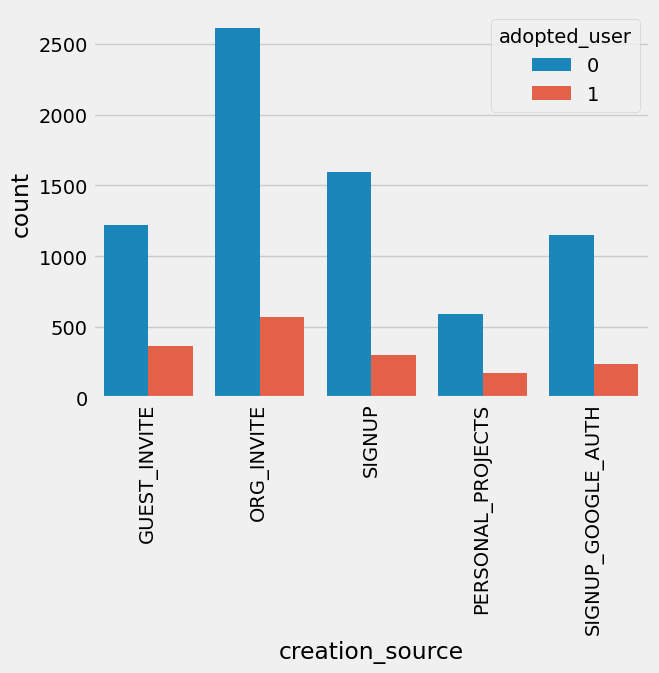

In [36]:
#Create Creation Plot
_ = sns.countplot(x='creation_source', data=datas, hue='adopted_user')
_ = plt.xticks(rotation=90)